In [1]:
import json
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk import pos_tag
import string
import nltk

In [2]:
#Read raw txt file 
def read_file(file):   
    rawdata = [] 
    tweets_file = open(file, "r") 
    for line in tweets_file:
        tweet = json.loads(line)
        rawdata.append(tweet)
    tweets_file.close()
    return rawdata
rawdata = read_file('t1.txt')

In [3]:
#Extract tweets text
def extract_text(data):    #Check if each tweet has retweet information, if it has, extract the original tweet, if not, extract the text information
    temp_data = pd.DataFrame(data, columns = ['text', 'retweeted_status', 'lang']) 
    temp_data['retweets'] = temp_data['retweeted_status'].notnull()  
    retweets = temp_data[(temp_data.retweets == True) & (temp_data.lang == 'en')]    
    alltweets = []
    for x in retweets['retweeted_status']: 
        alltweets.append(x['text'])          
    noretweets = temp_data[(temp_data.retweets == False) & (temp_data.lang == 'en')]  
    for x in noretweets['text']:  
        alltweets.append(x) 

    return alltweets
    
text = extract_text(rawdata)
len(text)

3176

In [4]:
text[:10]

['groSolar and CMS Energy begin operation of new 3.4-MW Wisconsin solar farm - https://t.co/2Iy57F6YE2',
 'groSolar and CMS Energy begin operation of new 3.4-MW Wisconsin solar farm - https://t.co/2Iy57F6YE2',
 'groSolar and CMS Energy begin operation of new 3.4-MW Wisconsin solar farm - https://t.co/2Iy57F6YE2',
 'groSolar and CMS Energy begin operation of new 3.4-MW Wisconsin solar farm - https://t.co/2Iy57F6YE2',
 "Californians urged to save energy during August's solar eclipse to reduce the strain on solar power resources. https://t.co/19BtnEaj9L",
 'groSolar and CMS Energy begin operation of new 3.4-MW Wisconsin solar farm - https://t.co/2Iy57F6YE2',
 'groSolar and CMS Energy begin operation of new 3.4-MW Wisconsin solar farm - https://t.co/2Iy57F6YE2',
 'groSolar and CMS Energy begin operation of new 3.4-MW Wisconsin solar farm - https://t.co/2Iy57F6YE2',
 'groSolar and CMS Energy begin operation of new 3.4-MW Wisconsin solar farm - https://t.co/2Iy57F6YE2',
 'groSolar and CMS En

In [4]:
def transform(tweet):   #Remove special characters, punctuation and stop words
    tknzr = TweetTokenizer()
    tweet = re.sub('http\S+', '', tweet)
    tweet = re.sub('@\S+', '', tweet)
    tweet = re.sub('#\S+', '', tweet) 
    tweet = tweet.replace('RT', '')
    tweet = tweet.replace('\'re', ' are')        
    tweet = tweet.strip()
    tweet = tweet.lower()
    tokens = tknzr.tokenize(tweet) 
    alpha_token = [word for word in tokens if word.isalpha()]
    remove_punc = [word for word in alpha_token if word not in string.punctuation]
    remove_stop = [word for word in remove_punc if word not in stopwords.words('english')]
    return ' '.join(remove_stop)

clean_data = list(map(transform, text))

In [6]:
clean_data[:10]

['grosolar cms energy begin operation new mw wisconsin solar farm',
 'grosolar cms energy begin operation new mw wisconsin solar farm',
 'grosolar cms energy begin operation new mw wisconsin solar farm',
 'grosolar cms energy begin operation new mw wisconsin solar farm',
 'californians urged save energy solar eclipse reduce strain solar power resources',
 'grosolar cms energy begin operation new mw wisconsin solar farm',
 'grosolar cms energy begin operation new mw wisconsin solar farm',
 'grosolar cms energy begin operation new mw wisconsin solar farm',
 'grosolar cms energy begin operation new mw wisconsin solar farm',
 'grosolar cms energy begin operation new mw wisconsin solar farm']

In [5]:
 def remove_duplicates(tweets):     #Remove duplicates and empty tweets
    tweets = list(set(tweets))
    tweets = list(filter(lambda s: len(s) > 0, tweets))
    return tweets
    
noduplicate  = remove_duplicates(clean_data)
len(noduplicate)

1738

In [8]:
noduplicate[:10]

['solar energy continues industry rise south carolina',
 'solar energy right home',
 'also wind solar generate th global final energy use people might really think something done',
 'rise mean',
 'pope francis inspires iowa church use solar energy youngstown vindicator',
 'solar expert predicts clean',
 'lighting information concepts solar powered energy',
 'bodhi soleil awakening sun knew mfs would use child solar energy',
 'yahoo news latest news headlinesin tucson competing interests fight solar energy profits',
 'tesla powerwall let households run entirely solar energy']

In [9]:
noduplicate[-10:]

['send solar farm like one putting controls energy controls dest',
 'solar eclipse impacting solar energy',
 'published medium post check',
 'solar power ready dominate energy thanks new tech',
 'new start wrote',
 'latest ees renewable energy news thanks',
 'heroically proving solar energy myth perpetuated uh argentinians make us less fun',
 'utility free solar collect energy days year free energy owner equipment',
 'solar panels turn rays electricity find minutes',
 'imagine avoided green wind solar trap invested nuclear c']

In [6]:
def find_verb(tweets):     #Find the verb for transforming to stem purpose
    tknzr = TweetTokenizer()
    stemverb = set()
    for sentence in tweets:
        terms = tknzr.tokenize(sentence) 
        tagged_terms = pos_tag(terms)
        for word in tagged_terms:
            if word[1].startswith('VBD') or word[1].startswith('VB') or word[1].startswith('VBP') or word[1].startswith('VBZ') or word[1].startswith('VBG') or word[1].startswith('VBN'):
                stemverb.add(word[0])
    return stemverb
    
verb = find_verb(noduplicate)

In [7]:
def find_stem(tweets, verb):    #Transform each word to its stem
    tknzr = TweetTokenizer()
    wnl = WordNetLemmatizer()
    stems = []       
    for sentence in tweets:
        terms = tknzr.tokenize(sentence)
        stem = []
        for word in terms:                
            if word in verb:
                word = wnl.lemmatize(word, 'v')
            else:
                word = wnl.lemmatize(word)
            stem.append(word)
        stems.append(stem)
    return stems 

stems = find_stem(noduplicate, verb)

In [9]:
def pos_tag_tweets(tweets):   #Pos tag each word
    pos_tag_tweet = []
    for sentence in tweets:
        pos_tag_tweet.append(pos_tag(sentence))
    return pos_tag_tweet

tag = pos_tag_tweets(stems)

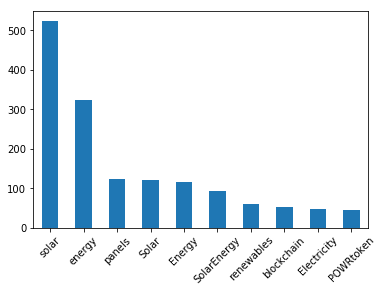

In [29]:
import matplotlib.pyplot as plt
def count_hashtag(data):    #top 10 hashtag 
    hashtag = []
    entities = pd.DataFrame(data, columns = ['entities'])
    for x in entities['entities']:
        if x['hashtags'] != []:
            for hasht in x['hashtags']:
                hashtag.append(hasht['text'])
    return hashtag
        
hashtag = pd.Series(count_hashtag(rawdata))
hashtag.value_counts()[:10].plot('bar', rot = 45)
plt.show()

In [14]:
 def category(tweets):   #Append words into noun, verb, adjectives and adverb category
    noun = []
    verb = []
    adjective = []
    adverb = []
    for sentence in tweets:
        for pair in sentence:
            if pair[1].startswith('NN') or pair[1].startswith('NNP') or pair[1].startswith('NNS'):
                noun.append(pair[0])
            elif pair[1].startswith('VBD') or pair[1].startswith('VB') or pair[1].startswith('VBP') or pair[1].startswith('VBZ') or pair[1].startswith('VBG') or pair[1].startswith('VBN'):
                verb.append(pair[0])
            elif pair[1].startswith('JJ'):
                adjective.append(pair[0])
            elif pair[1].startswith('RB'):
                adverb.append(pair[0])
    return noun, verb, adjective, adverb

noun, verb, adjective, adverb = category(tag)

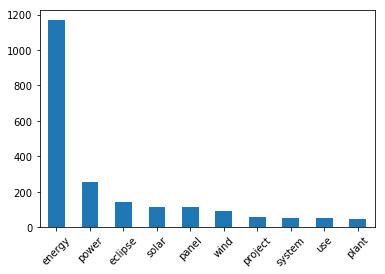

In [31]:
 def count_frequency(list):     #top 10 nouns (name-entity)
    list_s = pd.Series(list)
    list_s.value_counts()[:10].plot('bar', rot = 45)

count_frequency(noun)
plt.show()

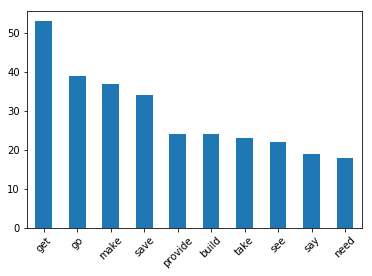

In [32]:
#top 10 verbs
count_frequency(verb)
plt.show()

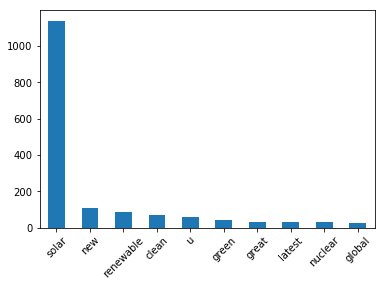

In [33]:
#top 10 adjectives
count_frequency(adjective)
plt.show()

In [36]:
def three_key_word(tweets):
    nnn = []
    jnn = []
    for tweet in tweets:
        for i in range(len(tweet) - 2):
            if tweet[i][1] == 'NN' and tweet[i + 1][1] == 'NN' and tweet[i + 2][1] == 'NN':
                nnn.append((tweet[i][0], tweet[i + 1][0], tweet[i + 2][0]))
            elif tweet[i][1] == 'JJ' and tweet[i + 1][1] == 'NN' and tweet[i + 2][1] == 'NN':
                jnn.append((tweet[i][0], tweet[i + 1][0], tweet[i + 2][0]))
    return nnn, jnn
    
nnn, jnn = three_key_word(tag)

In [39]:
#Three consecutive nouns
def value_count(list):
    list_s = pd.Series(list)
    return list_s.value_counts()[:10]
value_count(nnn)

(tesla, energy, tesla)       5
(wind, power, cost)          5
(pope, francis, inspire)     5
(city, tesla, energy)        5
(energy, storage, system)    5
(solar, energy, power)       4
(float, solar, farm)         4
(reshape, energy, market)    4
(power, percent, wind)       3
(market, growth, energy)     3
dtype: int64

In [11]:
clean = []
clean_topic = []
for sentence in tag:
    result = []
    for pair in sentence:
        if pair[1].startswith('NN') or pair[1].startswith('NNP') or pair[1].startswith('NNS'):
            result.append(pair[0])
    clean.append(' '.join(result))
    clean_topic.append(result)
clean[:10]

['destroy greedy oil baron wind ene',
 'energy act solar syste',
 'reason utility',
 'state energy',
 'community access point power',
 'labor day',
 'throw car biz biz cuz tesla',
 'attempt ship prius car photovoltaic roof tech',
 'energy eclipse affect operation',
 'energy produce pollution effect']

In [12]:
#use tf-idf to extract features   
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(clean)

#get feature names
terms = tfidf_vectorizer.get_feature_names()

In [22]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 10)
km.fit(tfidf_matrix)

#top 10 important words for each cluster
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    print()
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0:
 panel energy battery edf homeowner system technology year generate roof
Cluster 1:
 solar system energy california look utility capacity industry year texas
Cluster 2:
 power energy wind water plant country cost home americans pv
Cluster 3:
 world glass village brick energy deploy let kwara fast move
Cluster 4:
 thanks project energy news power thermal sahara utility aim module
Cluster 5:
 eclipse energy power grid moon month conserve home august today
Cluster 6:
 farm float world mine energy coast solar china coal year
Cluster 7:
 energy wind cost way coal company source plant news market
Cluster 8:
 use energy panel francis pope inspire church conserve power home
Cluster 9:
 blog post energy check fight benefit electricity tucson profit team


In [13]:
#Top identification
from gensim import corpora
dictionary = corpora.Dictionary(clean_topic)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_topic]

C:\Users\TINGTING\Anaconda3\lib\site-packages\gensim\utils.py:862: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [14]:
import gensim
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics = 10, id2word = dictionary, passes = 50)
ldamodel.print_topics(num_topics = 10, num_words = 30)

[(0,
  '0.078*"energy" + 0.036*"eclipse" + 0.034*"panel" + 0.025*"texas" + 0.020*"state" + 0.018*"solar" + 0.013*"generate" + 0.013*"electricity" + 0.010*"power" + 0.009*"rooftop" + 0.009*"use" + 0.008*"impact" + 0.007*"people" + 0.007*"moon" + 0.007*"month" + 0.005*"think" + 0.005*"company" + 0.005*"senator" + 0.005*"hydro" + 0.005*"u" + 0.004*"help" + 0.004*"market" + 0.004*"war" + 0.004*"penalty" + 0.004*"trade" + 0.004*"blind" + 0.004*"let" + 0.004*"part" + 0.004*"source" + 0.004*"air"'),
 (1,
  '0.158*"energy" + 0.056*"power" + 0.027*"wind" + 0.018*"home" + 0.015*"project" + 0.013*"solar" + 0.013*"news" + 0.013*"cost" + 0.009*"tesla" + 0.009*"eclipse" + 0.008*"company" + 0.008*"need" + 0.008*"bill" + 0.008*"plant" + 0.007*"use" + 0.006*"pv" + 0.006*"panel" + 0.005*"learn" + 0.005*"australia" + 0.005*"clean" + 0.005*"electricity" + 0.005*"report" + 0.005*"fuel" + 0.004*"fossil" + 0.004*"storage" + 0.004*"supply" + 0.004*"china" + 0.004*"partner" + 0.004*"august" + 0.004*"space"'),
